In [35]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np 

In [6]:
#Portfolio Versão 1 - Gold,Bitcoin,Ibovespa - 2017 a 2024
#Baixando Dados dos Ativos
gold = yf.download('GC=F', start='2017-01-01',progress=False)
bitcoin = yf.download('BTC-USD', start='2017-01-01',progress=False)
ibov = yf.download('^BVSP', start='2017-01-01',progress=False)
#Merge para criação do Dataframe
df = pd.merge(gold['Close'], bitcoin['Close'], on='Date', how='inner')
df = pd.merge(df, ibov['Close'], on='Date', how='inner')
df.columns = ['Gold', 'Bitcoin', 'Ibovespa']
#Conversão dos Dados para CSV
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
df.to_csv('../data/portfolio_v1.csv')

In [3]:
#Indicadores Versão 1 - IPCA - 2017 a 2024
# Carregar os dados do IPCA
ipca = pd.read_csv('../data/fontes_primarias/ipca_historico.csv', delimiter=';').transpose().reset_index().rename(columns={'index': 'Date', 0: 'Valor IPCA'})
# Definir as datas para o período de 2017 a 2024
ipca['Date'] = pd.date_range('1994-07-01', '2024-11-01', freq='M')
# Filtrar os dados entre 2017-01-01 e 2024-10-31
ipca = ipca[(ipca['Date'] >= pd.to_datetime('2017-01-01')) & (ipca['Date'] <= pd.to_datetime('2024-10-31'))]
# Criar uma lista de datas diárias entre 2017 e 2024
date_range = pd.date_range('2017-01-01', '2024-10-31', freq='D')
# Criar o DataFrame de IPCA diário replicando os valores para cada dia do mês
daily_ipca_df = pd.DataFrame({
    'Date': pd.date_range('2017-01-01', '2024-10-31', freq='D')
})
# Associar o valor do IPCA para cada dia, replicando os valores de cada mês
daily_ipca_df['Valor IPCA'] = daily_ipca_df['Date'].apply(
    lambda x: ipca.loc[ipca['Date'].dt.month == x.month, 'Valor IPCA'].values[0]
)
# Salvar o DataFrame
daily_ipca_df.to_csv('../data/indicadores_v1.csv', index=False)


In [4]:
#Merged V1 - Gold,IBOV,BTC + IPCA - 2017 a 2024
merged_df = pd.merge(df,daily_ipca_df, how='inner', on='Date')
merged_df.to_csv('../data/merged_v1.csv', index=False)

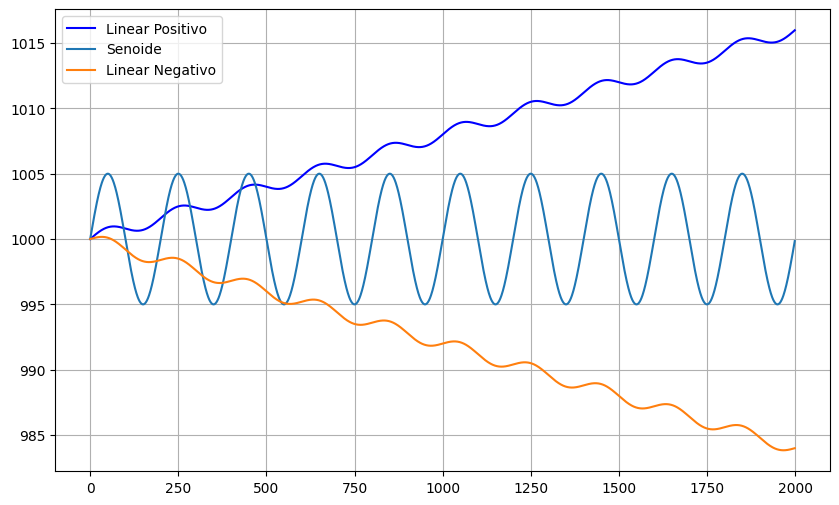

In [13]:
#Artificial V2
n_points = 2000  # número de pontos na série temporal
slope = 0.008    # taxa de aumento da linha (ascendente)
intercept = 1000  # valor inicial do preço

# Gerando os pontos da linha
x = np.arange(n_points)
y_linear = slope * x + intercept
y_linear2 = -slope * x + intercept

amplitude = 5       # amplitude da senoide
frequency = 0.01        # frequência (controle da periodicidade)

# Gerando a senoide
y_sine = amplitude * np.sin(np.pi * frequency * x) + 1000
y_sine_noise = y_sine - 1000

ipca = pd.read_csv('../data/indicadores_v1.csv')
ipca = ipca['Valor IPCA']
df = pd.DataFrame({'Linear Positivo':y_sine_noise/10 + y_linear,'Senoide':y_sine,'Linear Negativo':y_sine_noise/10 + y_linear2})
df = df.merge(ipca,how='inner',left_index=True,right_index=True)

# dividir o dataframe em treino e teste
df_train = df.iloc[:int(0.8 * len(df))]
df_test = df.iloc[int(0.8 * len(df)):]
df_train.to_csv('../data/artificial_v2_train.csv')
df_test.to_csv('../data/artificial_v2_test.csv')

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y_sine_noise/10 + y_linear, label='Linear Positivo', color='b')
plt.plot(x,y_sine,label='Senoide')
plt.plot(x,y_sine_noise/10 + y_linear2,label='Linear Negativo')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
#Indicadores Versão 2 - IBOVESPA,IPCA,SELIC,SOJA,FERRO,BRENT,DOLAR - 2017 a 2024
#DOLAR
dolar = yf.download('USDBRL=X',start='2017-01-01',progress=False)['Close'].reset_index()
dolar.columns = ['Date','DOLAR/REAL']
dolar['Date'] = pd.to_datetime(dolar['Date']).dt.tz_localize(None)
#IPCA
ipca = pd.read_csv('../data/fontes_primarias/ipca.csv', delimiter=';',encoding='latin1')
ipca.columns = ['Date','IPCA']
ipca['Date'] = pd.to_datetime(ipca['Date'],format='%m/%Y').dt.tz_localize(None)
ipca['IPCA'] = ipca['IPCA'].str.replace(',','.').astype(float)
ipca = ipca.set_index('Date').resample('D').ffill().reset_index()
#SELIC
selic = pd.read_csv('../data/fontes_primarias/selic.csv', delimiter=';',encoding='latin1')
selic.columns = ['Date','SELIC']
selic['Date'] = pd.to_datetime(selic['Date'],format='%d/%m/%Y').dt.tz_localize(None)
selic['SELIC'] = selic['SELIC'].str.replace(',','.').astype(float)
#SOJA INTERNACIONAL
soja = yf.download('SOYB',start='2017-01-01',progress=False)['Close'].reset_index()
soja.columns = ['Date','SOJA']
soja['Date'] = pd.to_datetime(soja['Date']).dt.tz_localize(None)
#FERRO INTERNACIONAL
ferro = yf.download('FM.TO',start='2017-01-01',progress=False)['Close'].reset_index()
ferro.columns = ['Date','FERRO']
ferro['Date'] = pd.to_datetime(ferro['Date']).dt.tz_localize(None)
#BRENT OIL
brent = yf.download('BZ=F',start='2017-01-01',progress=False)['Close'].reset_index()
brent.columns = ['Date','BRENT']
brent['Date'] = pd.to_datetime(brent['Date']).dt.tz_localize(None)
#IBOVESPA
ibov = yf.download('^BVSP',start='2016-01-01',progress=False)['Close'].reset_index()
ibov.columns = ['Date','IBOVESPA']
ibov['Date'] = pd.to_datetime(ibov['Date']).dt.tz_localize(None)
#Calcular Média Móvel de 15,30,60,90,180 dias
ibov['IBOVMM15'] = ibov['IBOVESPA'].rolling(window=15).mean()
ibov['IBOVMM30'] = ibov['IBOVESPA'].rolling(window=30).mean()
ibov['IBOVMM60'] = ibov['IBOVESPA'].rolling(window=60).mean()
ibov['IBOVMM90'] = ibov['IBOVESPA'].rolling(window=90).mean()
ibov['IBOVMM180'] = ibov['IBOVESPA'].rolling(window=180).mean()
ibov = ibov.drop(columns=['IBOVESPA'])
ibov = ibov[ibov['Date'] >= pd.to_datetime('2017-01-01')]
#Juntando DataFrames
indicadores2 = pd.merge(soja,ferro,how='inner',on='Date')
indicadores2 = pd.merge(indicadores2,brent,how='inner',on='Date')
indicadores2 = pd.merge(indicadores2,ibov,how='inner',on='Date')
indicadores2 = pd.merge(indicadores2,selic,how='inner',on='Date')
indicadores2 = pd.merge(indicadores2,ipca,how='inner',on='Date')
indicadores2 = pd.merge(indicadores2,dolar,how='inner',on='Date')
indicadores2.to_csv('../data/indicadores_v2.csv',index=False)


In [49]:
#Merged V2 - GOLD,BTC,IBOV + DOLAR,IBOVESPA,IPCA,SELIC,SOJA,FERRO,BRENT - 2017 a 2024
portfolio = pd.read_csv('../data/portfolio_v1.csv')
portfolio['Date'] = pd.to_datetime(portfolio['Date']).dt.tz_localize(None)
indicadores = pd.read_csv('../data/indicadores_v2.csv')
indicadores['Date'] = pd.to_datetime(indicadores['Date']).dt.tz_localize(None)  
merged_v2 = pd.merge(portfolio,indicadores2,how='inner',on='Date')
merged_v2 = merged_v2.drop(columns=['Unnamed: 0'])
#Normalizando cada uma das colunas -> Pode Ser Revisto
for col in merged_v2.columns[4:]:
    merged_v2[col] = (merged_v2[col] - merged_v2[col].min()) / (merged_v2[col].max() - merged_v2[col].min())
merged_v2.to_csv('../data/merged_v2.csv',index=False)

In [18]:
#Portfolio Versão 3 - FIXA11,BTC,IBOV + DOLAR,IBOVESPA,IPCA,SELIC,SOJA,FERRO,BRENT - 2017 a 2024
#Baixando Dados dos Ativos
fixa11 = yf.download('FIXA11.SA',start='2017-01-01',progress=False)
bitcoin = yf.download('BTC-USD', start='2017-01-01',progress=False)
ibov = yf.download('^BVSP', start='2017-01-01',progress=False)
#Merge para criação do Dataframe
df = pd.merge(fixa11['Close'], bitcoin['Close'], on='Date', how='inner')
df = pd.merge(df, ibov['Close'], on='Date', how='inner')
df.columns = ['Fixa11', 'Bitcoin', 'Ibovespa']
#Conversão dos Dados para CSV
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
df.to_csv('../data/portfolio_v3.csv')


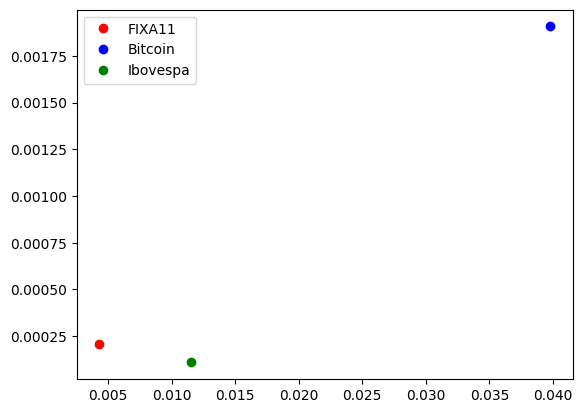

In [19]:
#Plotar gráfico de retorno médio por desvio padrão portfolio v3
portfolio_v3 = pd.read_csv('../data/portfolio_v3.csv')
portfolio_v3['Date'] = pd.to_datetime(portfolio_v3['Date']).dt.tz_localize(None)
portfolio_v3['Fixa11_Returns'] = portfolio_v3['Fixa11'].pct_change()
portfolio_v3['Bitcoin_Returns'] = portfolio_v3['Bitcoin'].pct_change()
portfolio_v3['Ibovespa_Returns'] = portfolio_v3['Ibovespa'].pct_change()
#Calculando Retorno Médio e Desvio Padrão
retorno_fixa = portfolio_v3['Fixa11_Returns'].mean()
retorno_bitcoin = portfolio_v3['Bitcoin_Returns'].mean()
retorno_ibov = portfolio_v3['Ibovespa_Returns'].mean()
desv_pad = portfolio_v3['Fixa11_Returns'].std()
desv_pad_bitcoin = portfolio_v3['Bitcoin_Returns'].std()
desv_pad_ibov = portfolio_v3['Ibovespa_Returns'].std()
plt.plot(desv_pad,retorno_fixa,'ro',label='FIXA11')
plt.plot(desv_pad_bitcoin,retorno_bitcoin,'bo',label='Bitcoin')
plt.plot(desv_pad_ibov,retorno_ibov,'go',label='Ibovespa')
plt.legend()
plt.show()



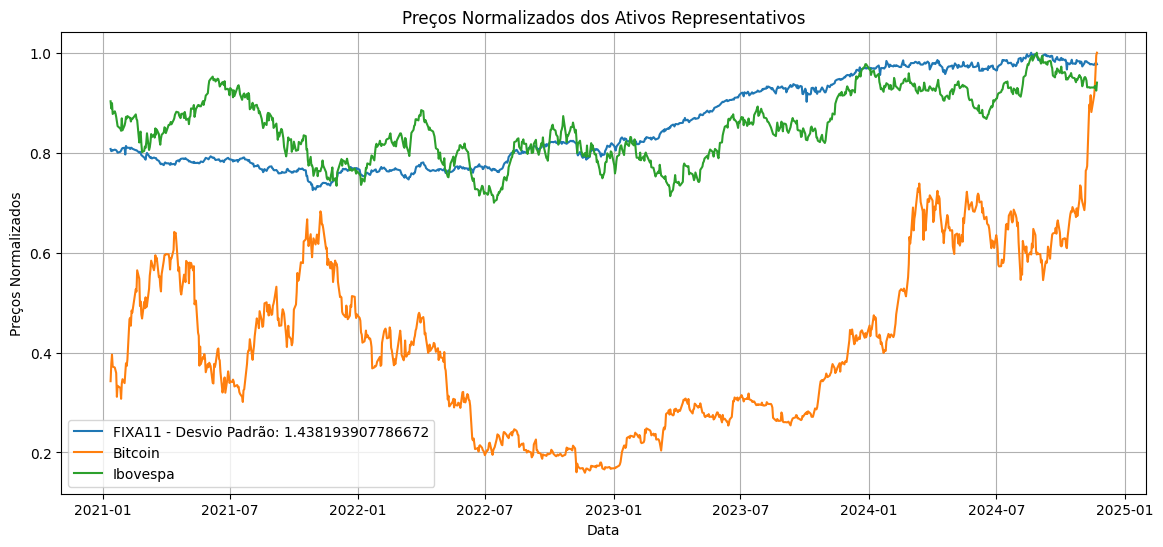

In [38]:
#Plotando Gráfico de Preços normalizados
portfolio_v3 = pd.read_csv('../data/portfolio_v3.csv')
portfolio_v3['Date'] = pd.to_datetime(portfolio_v3['Date']).dt.tz_localize(None)
#Calculando desvio padrão de cada ativo
desvio_fixa = portfolio_v3['Fixa11'].std()
desvio_bit = portfolio_v3['Bitcoin'].std()
desvio_ibo =portfolio_v3['Ibovespa'].std()

fig,ax= plt.subplots(figsize=(14,6))
ax.plot(portfolio_v3['Date'],portfolio_v3['Fixa11']/portfolio_v3['Fixa11'].max(),label=f'FIXA11 - Desvio Padrão: {desvio_fixa}')
ax.plot(portfolio_v3['Date'],portfolio_v3['Bitcoin']/portfolio_v3['Bitcoin'].max(),label='Bitcoin')
ax.plot(portfolio_v3['Date'],portfolio_v3['Ibovespa']/portfolio_v3['Ibovespa'].max(),label='Ibovespa')

ax.legend()
plt.xlabel('Data')
plt.grid(True)
plt.ylabel('Preços Normalizados')
plt.title('Preços Normalizados dos Ativos Representativos')
plt.show()

In [36]:
#Merged v4
portfolio_v3= pd.read_csv('../data/portfolio_v3.csv')
portfolio_v3['Date'] = pd.to_datetime(portfolio_v3['Date']).dt.tz_localize(None)
indicadores = pd.read_csv('../data/indicadores_v2.csv')
indicadores['Date'] = pd.to_datetime(indicadores['Date']).dt.tz_localize(None)
merged_v4 = pd.merge(portfolio_v3,indicadores,how='inner',on='Date')
merged_v4 = merged_v4.drop(columns=['Unnamed: 0'])
#Normalizando cada uma das colunas -> Pode Ser Revisto
for col in merged_v4.columns[4:]:
    merged_v4[col] = (merged_v4[col] - merged_v4[col].min()) / (merged_v4[col].max() - merged_v4[col].min())
merged_v4.to_csv('../data/merged_v4.csv',index=False)
#Criando Dataset de treino e teste
merged_v4_train = merged_v4.iloc[:int(0.85 * len(merged_v4))]
merged_v4_test = merged_v4.iloc[int(0.85 * len(merged_v4)):]
#Salvando os datasets
merged_v4_train.to_csv('../data/merged_v4_train.csv',index=False)
merged_v4_test.to_csv('../data/merged_v4_test.csv',index=False)


In [ ]:
#plote a variação de preço ao longo do tempo de merged v4
merged_v4 = pd.read_csv('../data/merged_v4.csv')
merged_v4['Date'] = pd.to_datetime(merged_v4['Date']).dt.tz_localize(None)
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_v4['Date'],y=merged_v4['Fixa11']/merged_v4['Fixa11'].sum(),mode='lines',name='FIXA11'))
fig.add_trace(go.Scatter(x=merged_v4['Date'],y=merged_v4['Bitcoin']/merged_v4['Bitcoin'].sum(),mode='lines',name='Bitcoin'))
fig.add_trace(go.Scatter(x=merged_v4['Date'],y=merged_v4['Ibovespa']/merged_v4['Ibovespa'].sum(),mode='lines',name='Ibovespa'))
fig.show()

In [ ]:
#Baixe as 10 principais criptos
